In [2]:
import os, glob, time, math
import numpy as np
import matplotlib.pyplot as plt, matplotlib.animation as animation, matplotlib.font_manager as fmg, matplotlib.colors as mpl_colors, matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.cm as cm
import seaborn as sns
from scipy.signal import savgol_filter, medfilt, argrelextrema
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'cm'  # Use the Computer Modern font set for math symbols

# USE DIFFERENT FONT
font_dir = r'/scratch/work/silvap1/fonts/arial'
font_files = glob.glob(font_dir + "/*ttf")
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Arial'

pcolors = ['#FF4136', '#FFDC00', '#2ECC40', '#0074D9', '#B10DC9', '#FF851B']
dcolors = ['#B20000', '#B28C00', '#006B36', '#002E5D', '#4D0039', '#B24700']
cTW = [(0, 0, 0, 0), (1, 1, 1, 1)]
triton = 1

colors = [#(0, 0, 0),   # black
          (.1, .1, .9),   # blue
          (.2, .8, 0),   # green
          (.8, .8, 0),   # yellow
          (.9, 0.4, 0), # orange
          (.9, 0, 0),   # red
          (.6, 0, .6)]#,   # pink
          #(1, 1, 1)]   # white
# Create the colormap
cmapTW = mpl_colors.ListedColormap(colors)
cmap = mpl_colors.LinearSegmentedColormap.from_list('my_colormap', list(colors))

#%matplotlib widget
%matplotlib inline
dpi = 300

if triton == 1:
    dir_path = r'/scratch/work/silvap1/temp' # CHANGE THIS FOLDER
    root = r'/scratch/work/silvap1'
    fsd = sorted(glob.glob(root + "/*mat_3d.npy"))
else:
    dir_path = r'\\home.org.aalto.fi\silvap1\data\Desktop\zahra\230414\temp' # CHANGE THIS FOLDER
    root = r'\\home.org.aalto.fi\silvap1\data\Desktop\zahra\230414'
    fsd = sorted(glob.glob(root + "\\*mat_3d.npy"))
fs = [f[-24:-11] for f in fsd]
#print(fs)

# Set figure size in centimeters
fig_width_cm = 5.5  # Width of the figure in centimeters
fig_height_cm = 5.5  # Height of the figure in centimeters
fig_width_in = fig_width_cm / 2.54  # Convert width to inches
fig_height_in = fig_height_cm / 2.54  # Convert height to inches

pcolor = sns.color_palette("colorblind",8)
lcolor = sns.color_palette("pastel",8)

clab = ['ZSØ1B', 'ZSØ1C', 'ZSØ2B', 'ZSØ2C', 'ZZØ2B', 'ZZØ2A', 'ZSØ2A', 'ZSØ1A']

In [3]:
t, h, rang1, rang2, el1, el2, tempMAX = [], [], [], [], [], [], []
avgh = 0
tmin = 1000
tOFF = np.zeros(8)
c0, c1, c2 = (0, 6, 14)
N = 1000
for c in range(c1, c2):
    #if c > 9 and c < 12: continue
    t.append(np.load(root + '/' + fs[c] + '_time_3d.npy'))
    temp = np.load(root + '/' + fs[c] + '_measure.npy')
    h.append(temp[0])
    rang1.append(temp[1])
    rang2.append(temp[2])
    el1.append(temp[3])
    el2.append(temp[4])
    tempMAX.append(temp[5])
    # Calculate tOFF
    tsm = medfilt(tempMAX[c0], kernel_size=7)
    dT = np.diff(tsm)
    dT2 = np.diff(dT)
    threshold = -0.3
    extr = np.where(dT2 < threshold)[0]
    for l in range(len(extr)):
        if t[c0][extr[l]] > 30:
            tOFF[c0] = extr[l] + 1
            if t[c0][extr[l]] < tmin:
                tmin = t[c0][extr[l]]
            break
    c0 += 1

# Temperature VS time plots


1 px = 0.08949 mm


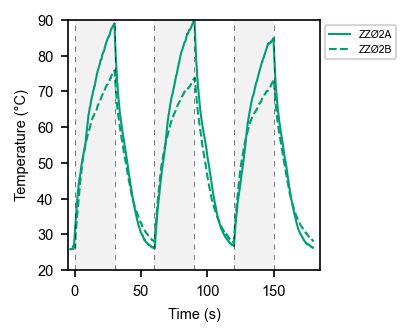

In [4]:
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
fig.patch.set_facecolor('None')
c0 = [13, 6, 7, 12, 8, 9, 11, 10]
px =  0.08949096568803461 #1332 / 1056 / h[6][0] * 10
print("1 px =", "{:.5f}".format(px), "mm")

pl = sns.color_palette("colorblind", 3)
ls = ['-', '--', ':']
ms = ['o', '^', 's']

for c in range(len(c0)):
    q = int(c0[c]-6)
    #if c > 9 and c < 12: continue
    x = np.linspace(t[q].min(), t[q].max(), N)
    y = np.interp(x, t[q], tempMAX[q])
    ysm = savgol_filter(y, window_length=41, polyorder=2, mode='interp')
    ti = t[q][int(tOFF[q])] - 30 #- tmin
    if 'ZS' in clab[q]:
        continue
    ax.plot(t[q]-ti, tempMAX[q], color = pl[int(c/3)], label = clab[q], alpha=1, zorder=-1, linewidth=1, linestyle=ls[np.mod(c,3)], marker=ms[np.mod(c,3)], markersize=0)
    #ax.plot(x-ti, ysm, color = lcolor[c0], zorder=2, lw=5, alpha=0.5)
    
for k in range(6):
    ax.plot([30*k, 30*k], [20, 120], color='black', linewidth=0.25, linestyle='dashed', dashes=(10, 10), zorder = -1)
    if np.mod(k,2) == 0:
        ax.axvspan(30*k, 30*(k+1), facecolor='gray', alpha=0.1, zorder=-2)
ax.legend(loc='best',prop=fmg.FontProperties(size=5), bbox_to_anchor=(1.0, 1.0))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlim((-5,185))
ax.set_ylim((20,90));
ax.set_ylabel('Temperature (°C)', fontsize=7)
ax.set_xlabel('Time (s)', fontsize=7);
plt.savefig(root + r'/temperature_ZZ.pdf', format='pdf', dpi=dpi, bbox_inches='tight',pad_inches=0)

1 px = 0.08949 mm


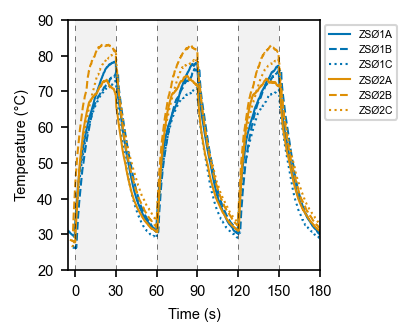

In [5]:
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
fig.patch.set_facecolor('None')
c0 = [13, 6, 7, 12, 8, 9, 11, 10]
px =  0.08949096568803461 #1332 / 1056 / h[6][0] * 10
print("1 px =", "{:.5f}".format(px), "mm")

pl = sns.color_palette("colorblind", 3)
ls = ['-', '--', ':']
ms = ['o', '^', 's']

for c in range(len(c0)):
    q = int(c0[c]-6)
    #if c > 9 and c < 12: continue
    x = np.linspace(t[q].min(), t[q].max(), N)
    y = np.interp(x, t[q], tempMAX[q])
    ysm = savgol_filter(y, window_length=41, polyorder=2, mode='interp')
    ti = t[q][int(tOFF[q])] - 30 #- tmin
    if 'ZZ' in clab[q]:
        continue
    ax.plot(t[q]-ti, tempMAX[q], color = pl[int(c/3)], label = clab[q], alpha=1, zorder=-1, linewidth=1, linestyle=ls[np.mod(c,3)], marker=ms[np.mod(c,3)], markersize=0)
    #ax.plot(x-ti, ysm, color = lcolor[c0], zorder=2, lw=5, alpha=0.5)
    
for k in range(6):
    ax.plot([30*k, 30*k], [20, 120], color='black', linewidth=0.25, linestyle='dashed', dashes=(10, 10), zorder = -1)
    if np.mod(k,2) == 0:
        ax.axvspan(30*k, 30*(k+1), facecolor='gray', alpha=0.1, zorder=-2)
ax.legend(loc='best',prop=fmg.FontProperties(size=5), bbox_to_anchor=(1.0, 1.0))
ax.tick_params(axis='both', labelsize=7)
ax.set_xlim((-5,180))
ax.set_ylim((20, 90))
ax.set_xticks(np.arange(0, 181, 30));
ax.set_yticks(np.arange(20, 91, 10));
ax.set_ylabel('Temperature (°C)', fontsize=7)
ax.set_xlabel('Time (s)', fontsize=7);
plt.savefig(root + r'/temperature_ZS.pdf', format='pdf', dpi=dpi, bbox_inches='tight',pad_inches=0)

# Actuation VS time

1 px = 0.08949 mm
ZSØ1A L0 = 13.85 mm
ZSØ1B L0 = 17.19 mm
ZSØ1C L0 = 14.64 mm
ZSØ2A L0 = 13.00 mm
ZSØ2B L0 = 15.38 mm
ZSØ2C L0 = 14.42 mm
ZZØ2A L0 = 29.69 mm
ZZØ2B L0 = 30.47 mm


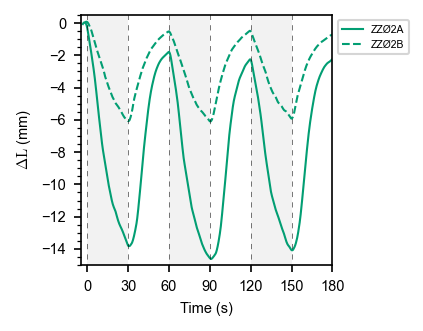

In [6]:
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
fig.patch.set_facecolor('None')
c0 = [13, 6, 7, 12, 8, 9, 11, 10]
px =  0.08949096568803461 #1332 / 1056 / h[6][0] * 10
print("1 px =", "{:.5f}".format(px), "mm")

pl = sns.color_palette("colorblind", 3)
ls = ['-', '--', ':']
ms = ['o', '^', 's']

for c in range(len(c0)):
    q = int(c0[c]-6)
    print(str(clab[q]), 'L0 =', "{:.2f}".format(h[q][0]*px), "mm")
    f0 = 1 / h[q][0]
    x = np.linspace(t[q].min(), t[q].max(), N)
    y = np.interp(x, t[q], h[q])
    y = px * (y - y[0])
    ysm = savgol_filter(y, window_length=21, polyorder=2, mode='interp')
    ti = t[q][int(tOFF[q])] - 30
    if 'ZS' in clab[q]:
        continue
    #ax.plot(t[c0]-ti, h[c0], 'o', color = pcolors[c0], alpha = 1, markersize=2, markeredgewidth = 0.2, markeredgecolor='black')
    ax.plot(x-ti, ysm, color = pl[int(c/3)], label = clab[q], alpha=1, zorder=-1, linewidth=1, linestyle=ls[np.mod(c,3)], marker=ms[np.mod(c,3)], markersize=0)

for k in range(6):
    ax.plot([30*k, 30*k], [-20, 120], color='black', linewidth=0.25, linestyle='dashed', dashes=(10, 10), zorder = -1)
    if np.mod(k,2) == 0:
        ax.axvspan(30*k, 30*(k+1), facecolor='gray', alpha=0.1, zorder=-2)
ax.legend(loc='best',prop=fmg.FontProperties(size=5), bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel('$\mathrm{\Delta L}$ (mm)', fontsize=7)
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('Time (s)', fontsize=7)
ax.set_xlim((-5,180))
ax.set_ylim((-15,0.5))
ax.set_xticks(np.arange(0, 181, 30))
ax.set_yticks(np.arange(-14, 0.1, 2));
minor_locator = ticker.FixedLocator(np.arange(-15,5,0.5))
ax.yaxis.set_minor_locator(minor_locator)
plt.savefig(root + r'/actuation_ZZ.pdf', format='pdf', dpi=dpi, bbox_inches='tight',pad_inches=0)

1 px = 0.08949 mm
ZSØ1A L0 = 13.85 mm
ZSØ1B L0 = 17.19 mm
ZSØ1C L0 = 14.64 mm
ZSØ2A L0 = 13.00 mm
ZSØ2B L0 = 15.38 mm
ZSØ2C L0 = 14.42 mm
ZZØ2A L0 = 29.69 mm
ZZØ2B L0 = 30.47 mm


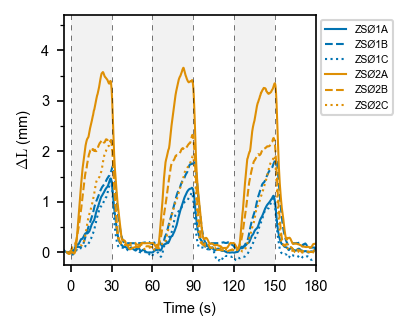

In [11]:
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
fig.patch.set_facecolor('None')
c0 = [13, 6, 7, 12, 8, 9, 11, 10]
px =  0.08949096568803461 #1332 / 1056 / h[6][0] * 10
print("1 px =", "{:.5f}".format(px), "mm")

pl = sns.color_palette("colorblind", 3)
ls = ['-', '--', ':']
ms = ['o', '^', 's']

tw = [5.2, 5.2, 5.2, 6.0, 5.6, 4.5]

for c in range(len(c0)):
    q = int(c0[c]-6)
    print(str(clab[q]), 'L0 =', "{:.2f}".format(h[q][0]*px), "mm")
    f0 = 1 / h[q][0]
    x = np.linspace(t[q].min(), t[q].max(), N)
    y = np.interp(x, t[q], h[q])
    y = px * (y - y[0])
    ysm = savgol_filter(y, window_length=21, polyorder=2, mode='interp')
    ti = t[q][int(tOFF[q])] - 30
    #ax.plot(t[c0]-ti, h[c0], 'o', color = pcolors[c0], alpha = 1, markersize=2, markeredgewidth = 0.2, markeredgecolor='black')
    if 'ZZ' in clab[q]:
        continue
    ax.plot(x-ti,6*ysm/tw[c], color = pl[int(c/3)], label = clab[q], alpha=1, zorder=-1, linewidth=1, linestyle=ls[np.mod(c,3)], marker=ms[np.mod(c,3)], markersize=0)

for k in range(6):
    ax.plot([30*k, 30*k], [-20, 120], color='black', linewidth=0.25, linestyle='dashed', dashes=(10, 10), zorder = -1)
    if np.mod(k,2) == 0:
        ax.axvspan(30*k, 30*(k+1), facecolor='gray', alpha=0.1, zorder=-2)
ax.legend(loc='best',prop=fmg.FontProperties(size=5), bbox_to_anchor=(1.0, 1.0))
ax.tick_params(axis='both', labelsize=7)
ax.set_ylabel('$\mathrm{\Delta L}$ (mm)', fontsize=7)
ax.set_xlabel('Time (s)', fontsize=7)
ax.set_xlim((-5,180))
ax.set_ylim((-0.25,4.7))
ax.set_xticks(np.arange(0, 181, 30))
ax.set_yticks(np.arange(0, 4.7, 1));
minor_locator = ticker.FixedLocator(np.arange(-15,5,0.5))
ax.yaxis.set_minor_locator(minor_locator)
plt.savefig(root + r'/actuation_ZS.pdf', format='pdf', dpi=dpi, bbox_inches='tight',pad_inches=0)

# Angle VS time

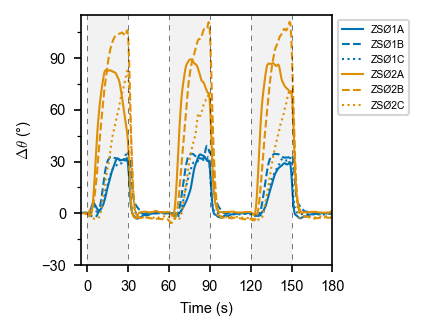

In [22]:
# Set the font family to Arial
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
fig.patch.set_facecolor('None')
pl = sns.color_palette("colorblind", 3)
ls = ['-', '--', ':']
ms = ['o', '^', 's']
c0 = [13, 6, 7, 12, 8, 9, 11, 10]

for c in range(len(c0)):
    #if c > 9 and c < 12: continue
    q = int(c0[c]-6)
    ang1 = el1[q]
    ang2 = el2[q]
    ang1[ang1>100] -= 180
    ang2[ang2>100] -= 180
    x = np.linspace(t[q].min(), t[q].max(), N)
    y1 = np.interp(x, t[q], ang1)
    y2 = np.interp(x, t[q], ang2)
    ysm1 = savgol_filter(y1, window_length=21, polyorder=2, mode='interp')
    ysm2 = savgol_filter(y2, window_length=21, polyorder=2, mode='interp')
    ti = t[q][int(tOFF[q])]-30
    #ax.plot(t[c0]-ti, ang2-ang1, '.', color = pcolor[c0], alpha = 0.5)
    dy = ysm2-ysm1
    #if q > 5:
    dy -= dy[0]
    if 'ZZ' in clab[q]:
        continue
    ax.plot(x-ti, dy, color = pl[int(c/3)], label = clab[q], alpha=1, zorder=-1, linewidth=1, linestyle=ls[np.mod(c,3)], marker=ms[np.mod(c,3)], markersize=0)

for k in range(6):
    ax.plot([30*k, 30*k], [-180, 180], color='black', linewidth=0.25, linestyle='dashed', dashes=(10, 10), zorder = -1)
    if np.mod(k,2) == 0:
        ax.axvspan(30*k, 30*(k+1), facecolor='gray', alpha=0.1, zorder=-2)
ax.legend(loc='best',prop=fmg.FontProperties(size=5), bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel(r'$\Delta \theta$ (°)', fontsize=7)
ax.tick_params(axis='both', labelsize=7)
ax.set_xlabel('Time (s)', fontsize=7)
ax.set_xlim((-5,180))
ax.set_ylim((-30,115))
ax.set_xticks(np.arange(0, 181, 30))
ax.set_yticks(np.arange(-30, 110, 30));
minor_locator = ticker.FixedLocator(np.arange(-30,106,15))
ax.yaxis.set_minor_locator(minor_locator)
plt.savefig(root + r'/angle_ZS.pdf', format='pdf', dpi=dpi, bbox_inches='tight',pad_inches=0)

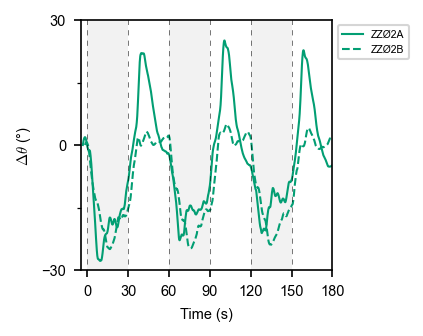

In [23]:
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
fig.patch.set_facecolor('None')
pl = sns.color_palette("colorblind", 3)
ls = ['-', '--', ':']
ms = ['o', '^', 's']
c0 = [13, 6, 7, 12, 8, 9, 11, 10]

for c in range(len(c0)):
    #if c > 9 and c < 12: continue
    q = int(c0[c]-6)
    ang1 = el1[q]
    ang2 = el2[q]
    ang1[ang1>100] -= 180
    ang2[ang2>100] -= 180
    x = np.linspace(t[q].min(), t[q].max(), N)
    y1 = np.interp(x, t[q], ang1)
    y2 = np.interp(x, t[q], ang2)
    ysm1 = savgol_filter(y1, window_length=21, polyorder=2, mode='interp')
    ysm2 = savgol_filter(y2, window_length=21, polyorder=2, mode='interp')
    ti = t[q][int(tOFF[q])]-30
    #ax.plot(t[c0]-ti, ang2-ang1, '.', color = pcolor[c0], alpha = 0.5)
    dy = ysm2-ysm1
    #if q > 5:
    dy -= dy[0]
    if 'ZS' in clab[q]:
        continue
    ax.plot(x-ti, dy, color = pl[int(c/3)], label = clab[q], alpha=1, zorder=-1, linewidth=1, linestyle=ls[np.mod(c,3)], marker=ms[np.mod(c,3)], markersize=0)

for k in range(6):
    ax.plot([30*k, 30*k], [-180, 180], color='black', linewidth=0.25, linestyle='dashed', dashes=(10, 10), zorder = -1)
    if np.mod(k,2) == 0:
        ax.axvspan(30*k, 30*(k+1), facecolor='gray', alpha=0.1, zorder=-2)
ax.legend(loc='best',prop=fmg.FontProperties(size=5), bbox_to_anchor=(1.0, 1.0))
ax.tick_params(axis='both', labelsize=7)
ax.set_ylabel(r'$\Delta \theta$ (°)', fontsize=7)
ax.set_xlabel('Time (s)', fontsize=7)
ax.set_xlim((-5,180))
ax.set_ylim((-30,30))
ax.set_xticks(np.arange(0, 181, 30))
ax.set_yticks(np.arange(-30, 31, 30));
minor_locator = ticker.FixedLocator(np.arange(-30,106,15))
ax.yaxis.set_minor_locator(minor_locator)
plt.savefig(root + r'/angle_ZZ.pdf', format='pdf', dpi=dpi, bbox_inches='tight',pad_inches=0)

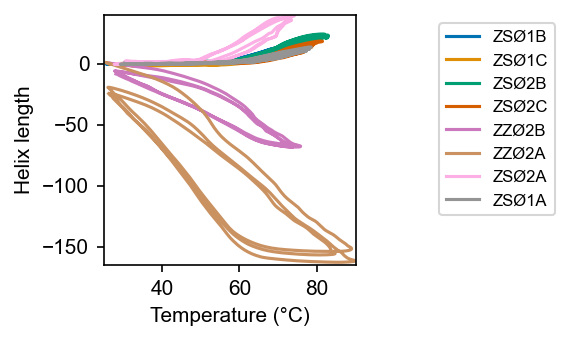

In [24]:
plt.close()
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in), dpi = 150)
c0 = 0
for c in range(c1, c2):
    #if c > 9 and c < 12: continue
    x = np.linspace(t[c0].min(), t[c0].max(), N)
    yACT = np.interp(x, t[c0], h[c0])
    yTEMP = np.interp(x, t[c0], tempMAX[c0])
    ysmA = savgol_filter(yACT, window_length=21, polyorder=2, mode='interp')
    ysmT = savgol_filter(yTEMP, window_length=21, polyorder=2, mode='interp')
    #ax.plot(yTEMP, yACT-yACT[0], '.', color = pcolor[c0], markersize=3, markeredgecolor='none', alpha = 1, zorder=3, label = clab[c0])
    ax.plot(ysmT, ysmA-ysmA[0], color = pcolor[c0], label = clab[c0])
    c0 += 1
ax.legend(loc='best',prop=fmg.FontProperties(size=8), bbox_to_anchor=(1.3, 1))
ax.set_ylabel(r'Helix length')
ax.set_xlabel('Temperature (°C)')
ax.set_xlim((25, 90))
ax.set_ylim((-165, 40));

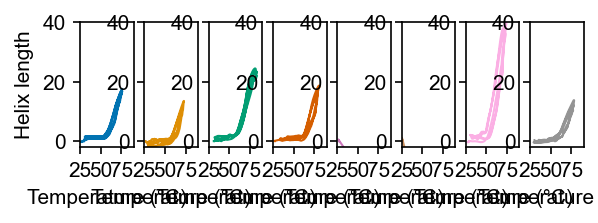

In [21]:
plt.close()
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(fig_width_in*2, fig_height_in/2), dpi = 150)
c0 = 0
for c in range(c1, c2):
    #if c > 9 and c < 12: continue
    x = np.linspace(t[c0].min(), t[c0].max(), N)
    yACT = np.interp(x, t[c0], h[c0])
    yTEMP = np.interp(x, t[c0], tempMAX[c0])
    ysmA = savgol_filter(yACT, window_length=21, polyorder=2, mode='interp')
    ysmT = savgol_filter(yTEMP, window_length=21, polyorder=2, mode='interp')
    #ax.plot(yTEMP, yACT-yACT[0], '.', color = pcolor[c0], markersize=3, markeredgecolor='none', alpha = 1, zorder=3, label = clab[c0])
    ax[c0].plot(ysmT, ysmA-ysmA[0], color = pcolor[c0], label = clab[c0], linewidth=1)
    ax[c0].set_xlabel('Temperature (°C)')
    ax[c0].set_xlim((25, 90))
    ax[c0].set_ylim((-2, 40))
    c0 += 1
#ax.legend(loc='best',prop=fmg.FontProperties(size=8), bbox_to_anchor=(1.3, 1))
ax[0].set_ylabel(r'Helix length');
